In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
prev_data = pd.read_csv('previous_application.csv')

In [3]:
prev_data.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#to know the size of the data 
prev_data.shape

(1670214, 37)

In [5]:
#to know the type of data 
prev_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [6]:
#to know the distribution of data
prev_data.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,...,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1.670214e+06,1.670214e+06,1.297979e+06,1.670214e+06,1.670213e+06,7.743700e+05,1.284699e+06,1.670214e+06,1.670214e+06,774370.000000,...,5951.000000,1.670214e+06,1.670214e+06,1.297984e+06,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000,997149.000000
mean,1.923089e+06,2.783572e+05,1.595512e+04,1.752339e+05,1.961140e+05,6.697402e+03,2.278473e+05,1.248418e+01,9.964675e-01,0.079637,...,0.773503,-8.806797e+02,3.139511e+02,1.605408e+01,342209.855039,13826.269337,33767.774054,76582.403064,81992.343838,0.332570
std,5.325980e+05,1.028148e+05,1.478214e+04,2.927798e+05,3.185746e+05,2.092150e+04,3.153966e+05,3.334028e+00,5.932963e-02,0.107823,...,0.100879,7.790997e+02,7.127443e+03,1.456729e+01,88916.115834,72444.869708,106857.034789,149647.415123,153303.516729,0.471134
min,1.000001e+06,1.000010e+05,0.000000e+00,0.000000e+00,0.000000e+00,-9.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-0.000015,...,0.373150,-2.922000e+03,-1.000000e+00,0.000000e+00,-2922.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,1.461857e+06,1.893290e+05,6.321780e+03,1.872000e+04,2.416050e+04,0.000000e+00,5.084100e+04,1.000000e+01,1.000000e+00,0.000000,...,0.715645,-1.300000e+03,-1.000000e+00,6.000000e+00,365243.000000,-1628.000000,-1242.000000,-1314.000000,-1270.000000,0.000000
50%,1.923110e+06,2.787145e+05,1.125000e+04,7.104600e+04,8.054100e+04,1.638000e+03,1.123200e+05,1.200000e+01,1.000000e+00,0.051605,...,0.835095,-5.810000e+02,3.000000e+00,1.200000e+01,365243.000000,-831.000000,-361.000000,-537.000000,-499.000000,0.000000
75%,2.384280e+06,3.675140e+05,2.065842e+04,1.803600e+05,2.164185e+05,7.740000e+03,2.340000e+05,1.500000e+01,1.000000e+00,0.108909,...,0.852537,-2.800000e+02,8.200000e+01,2.400000e+01,365243.000000,-411.000000,129.000000,-74.000000,-44.000000,1.000000
max,2.845382e+06,4.562550e+05,4.180581e+05,6.905160e+06,6.905160e+06,3.060045e+06,6.905160e+06,2.300000e+01,1.000000e+00,1.000000,...,1.000000,-1.000000e+00,4.000000e+06,8.400000e+01,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [7]:
#calculating the missing data
total = prev_data.isnull().sum().sort_values(ascending=False)
percent = (100*(prev_data.isnull().sum()/prev_data.isnull().count())).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print (missing_data)

                               Total    Percent
RATE_INTEREST_PRIVILEGED     1664263  99.643698
RATE_INTEREST_PRIMARY        1664263  99.643698
RATE_DOWN_PAYMENT             895844  53.636480
AMT_DOWN_PAYMENT              895844  53.636480
NAME_TYPE_SUITE               820405  49.119754
DAYS_TERMINATION              673065  40.298129
NFLAG_INSURED_ON_APPROVAL     673065  40.298129
DAYS_FIRST_DRAWING            673065  40.298129
DAYS_FIRST_DUE                673065  40.298129
DAYS_LAST_DUE_1ST_VERSION     673065  40.298129
DAYS_LAST_DUE                 673065  40.298129
AMT_GOODS_PRICE               385515  23.081773
AMT_ANNUITY                   372235  22.286665
CNT_PAYMENT                   372230  22.286366
PRODUCT_COMBINATION              346   0.020716
AMT_CREDIT                         1   0.000060
SK_ID_CURR                         0   0.000000
NAME_CONTRACT_TYPE                 0   0.000000
WEEKDAY_APPR_PROCESS_START         0   0.000000
HOUR_APPR_PROCESS_START            0   0

In [8]:
#remove the nan values and columns with least values
##removing the SK_ID as we are not merging the files
new_df = prev_data.drop(['RATE_INTEREST_PRIVILEGED','RATE_INTEREST_PRIMARY','SK_ID_PREV','SK_ID_CURR'],axis = 1)


In [9]:
new_df.dropna(inplace=True)

In [10]:
total = new_df.isnull().sum().sort_values(ascending=False)
percent = (100*(new_df.isnull().sum()/new_df.isnull().count())).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
print (missing_data)

                             Total  Percent
NFLAG_INSURED_ON_APPROVAL        0      0.0
CODE_REJECT_REASON               0      0.0
AMT_ANNUITY                      0      0.0
AMT_APPLICATION                  0      0.0
AMT_CREDIT                       0      0.0
AMT_DOWN_PAYMENT                 0      0.0
AMT_GOODS_PRICE                  0      0.0
WEEKDAY_APPR_PROCESS_START       0      0.0
HOUR_APPR_PROCESS_START          0      0.0
FLAG_LAST_APPL_PER_CONTRACT      0      0.0
NFLAG_LAST_APPL_IN_DAY           0      0.0
RATE_DOWN_PAYMENT                0      0.0
NAME_CASH_LOAN_PURPOSE           0      0.0
NAME_CONTRACT_STATUS             0      0.0
DAYS_DECISION                    0      0.0
NAME_PAYMENT_TYPE                0      0.0
NAME_TYPE_SUITE                  0      0.0
DAYS_TERMINATION                 0      0.0
NAME_CLIENT_TYPE                 0      0.0
NAME_GOODS_CATEGORY              0      0.0
NAME_PORTFOLIO                   0      0.0
NAME_PRODUCT_TYPE               

In [11]:
new_df.corr(method = 'kendall')

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
AMT_ANNUITY,1.000000,0.660310,0.649455,0.083585,0.660310,0.018856,NaN,-0.101448,0.166743,0.035774,-0.018769,0.001581,0.166541,0.157118,0.164058,0.162900,-0.036985
AMT_APPLICATION,0.660310,1.000000,0.891771,0.105951,1.000000,0.039201,NaN,-0.126515,0.174831,0.101914,0.306979,-0.002030,0.174539,0.224841,0.218237,0.216280,-0.092799
AMT_CREDIT,0.649455,0.891771,1.000000,0.003278,0.891771,0.033758,NaN,-0.230018,0.191066,0.104120,0.355275,-0.002070,0.190703,0.248312,0.240608,0.238440,-0.080190
AMT_DOWN_PAYMENT,0.083585,0.105951,0.003278,1.000000,0.105951,0.024284,NaN,0.744312,-0.147162,0.024247,-0.171778,0.003630,-0.146918,-0.175099,-0.171120,-0.170005,-0.062511
AMT_GOODS_PRICE,0.660310,1.000000,0.891771,0.105951,1.000000,0.039201,NaN,-0.126515,0.174831,0.101914,0.306979,-0.002030,0.174539,0.224841,0.218237,0.216280,-0.092799
HOUR_APPR_PROCESS_START,0.018856,0.039201,0.033758,0.024284,0.039201,1.000000,NaN,0.016373,0.034506,0.079630,0.017110,0.002788,0.034378,0.038334,0.037579,0.036998,-0.029547
NFLAG_LAST_APPL_IN_DAY,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
RATE_DOWN_PAYMENT,-0.101448,-0.126515,-0.230018,0.744312,-0.126515,0.016373,NaN,1.000000,-0.204617,-0.038819,-0.286038,0.003629,-0.204112,-0.245747,-0.241243,-0.239312,-0.040309
DAYS_DECISION,0.166743,0.174831,0.191066,-0.147162,0.174831,0.034506,NaN,-0.204617,1.000000,0.078030,0.059792,-0.004267,0.997975,0.888849,0.892215,0.884608,-0.234549
SELLERPLACE_AREA,0.035774,0.101914,0.104120,0.024247,0.101914,0.079630,NaN,-0.038819,0.078030,1.000000,0.065343,0.004206,0.077546,0.088711,0.088257,0.088259,-0.129394


In [12]:
#removing all the highly co-related values for easy analysis, i.e. more than .8
new_df.drop(['AMT_CREDIT','AMT_GOODS_PRICE','NFLAG_LAST_APPL_IN_DAY'], axis = 1, inplace = True)

In [13]:
new_df.head()

,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_DOWN_PAYMENT,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,RATE_DOWN_PAYMENT,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
13,Consumer loans,7654.860,53779.5,0.0,SUNDAY,15,Y,0.000000,XAP,Approved,...,Consumer electronics,8.0,low_action,POS household without interest,365243.0,-378.0,-168.0,-168.0,-163.0,1.0
15,Consumer loans,21307.455,126490.5,12649.5,TUESDAY,7,Y,0.103971,XAP,Approved,...,Industry,6.0,low_normal,POS other with interest,365243.0,-668.0,-518.0,-518.0,-512.0,0.0
16,Consumer loans,4187.340,26955.0,1350.0,SATURDAY,12,Y,0.051324,XAP,Approved,...,Consumer electronics,8.0,high,POS household with interest,365243.0,-1440.0,-1230.0,-1230.0,-1226.0,0.0
28,Consumer loans,7656.705,74610.0,9000.0,MONDAY,14,Y,0.131374,XAP,Approved,...,Connectivity,12.0,low_normal,POS mobile with interest,365243.0,-2671.0,-2341.0,-2341.0,-2332.0,0.0
35,Consumer loans,12065.535,56655.0,0.0,SATURDAY,7,Y,0.000000,XAP,Approved,...,Consumer electronics,6.0,middle,POS household with interest,365243.0,-645.0,-495.0,-495.0,-493.0,0.0


In [14]:
new_df.describe()

,AMT_ANNUITY,AMT_APPLICATION,AMT_DOWN_PAYMENT,HOUR_APPR_PROCESS_START,RATE_DOWN_PAYMENT,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,430536.000000,4.305360e+05,4.305360e+05,430536.000000,430536.000000,430536.000000,4.305360e+05,430536.000000,430536.000000,430536.000000,430536.000000,430536.000000,430536.000000,430536.000000
mean,10365.224364,9.455608e+04,7.105576e+03,12.864885,0.087500,-1456.961004,7.720855e+02,11.339022,365237.056125,2275.815411,-1099.097165,34485.562824,35741.535247,0.264496
std,7969.946709,8.461311e+04,1.557784e+04,3.302271,0.111807,814.156790,1.085131e+04,5.706496,1474.084358,36729.957759,2515.141085,108805.634149,110473.337616,0.441065
min,635.040000,5.400000e+03,0.000000e+00,0.000000,0.000000,-2922.000000,-1.000000e+00,0.000000,-420.000000,-2892.000000,-2801.000000,-2889.000000,-2874.000000,0.000000
25%,5197.995000,3.955500e+04,0.000000e+00,11.000000,0.000000,-2173.000000,3.700000e+01,6.000000,365243.000000,-2140.000000,-1833.000000,-1858.000000,-1836.000000,0.000000
50%,8322.255000,7.236000e+04,2.610000e+03,13.000000,0.096088,-1458.000000,1.280000e+02,10.000000,365243.000000,-1426.000000,-1090.000000,-1138.000000,-1127.500000,0.000000
75%,13075.425000,1.215000e+05,9.000000e+03,15.000000,0.108909,-829.000000,9.510000e+02,12.000000,365243.000000,-797.000000,-455.000000,-532.000000,-521.000000,1.000000
max,393868.665000,3.510000e+06,3.060045e+06,23.000000,1.000000,-1.000000,4.000000e+06,60.000000,365243.000000,365243.000000,365243.000000,365243.000000,365243.000000,1.000000


In [15]:
#remove outlier
q1 = new_df['AMT_ANNUITY'].quantile(0.25)
q3 = new_df['AMT_ANNUITY'].quantile(0.75)
iqr = q3-q1
low = q1-1.5*iqr
high = q3+1.5*iqr
new_df = new_df.loc[(new_df['AMT_ANNUITY']>low) & (new_df['AMT_ANNUITY']<high)]

Text(0, 0.5, 'count')

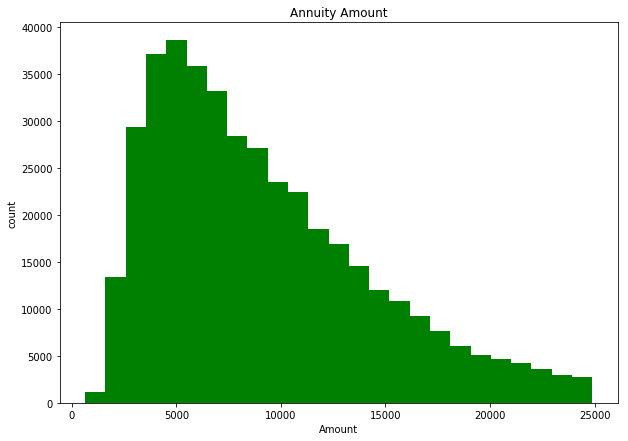

In [16]:
plt.figure(figsize = (10,7))
x = new_df ['AMT_ANNUITY']
plt.hist(x, bins = 25, color = 'green')
plt.title('Annuity Amount')
plt.xlabel('Amount')
plt.ylabel('count')

It shows that the data is right skewed and the average is around 8000, which indicates that the most of the population tends to make an Annuity amount of less than 10000 per month.

In [ ]:
new_df.describe()

In [ ]:

plt.figure(figsize = (8,7))
x = new_df ['HOUR_APPR_PROCESS_START']
plt.hist(x, bins = 25, color = 'green')
plt.title('Processing Hours')
plt.xlabel('Time')
plt.ylabel('count')

It shows that the client appears to apply fo loan during the afternoon since it is left skewed.